In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()

y_target = m * x_valid + b # ideal (target) linear function

# costruisco campioni (output) di training e set

sigma = 0.2 
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

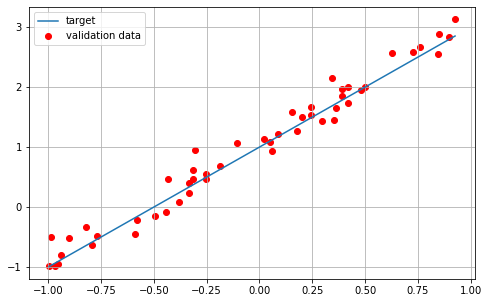

In [3]:
# plot validation and target dataset

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import seaborn as sns

sns.set_theme(font_scale=1.7, style='whitegrid')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LeakyReLU
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [5]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [6]:
sigma   = [0.2, 0.4, 0.6, 0.8, 1.0]
Nepochs = [2, 10, 20, 50, 100]
Ntrain  = [50, 100, 500, 1000, 2000]

In [ ]:
#Per ora non si vedono i log di keras perché ho commentato e scommentato la cella
#Se li avessi lasciati ci sarebbero state numerose righe di output

train_loss = np.zeros((5, 5))
test_loss  = np.zeros((5, 5))

for epoc in Nepochs:
    print("25 run per esplorare il caso Nepochs=", epoc)
    for i in tqdm(range(5)):
        for j in range(5):
            x_train = np.random.uniform(-1, 1, Ntrain[i])
            x_valid = np.random.uniform(-1, 1, 50)
            x_valid.sort()
            y_target = m * x_valid + b 

            sig = 0.2*j

            y_train = np.random.normal(m * x_train + b, sig) 
            y_valid = np.random.normal(m * x_valid + b, sig)
            
            # per ricominciare da capo il training ogni volta devo definire da zero la rete
            # così posso vedere il risultato ottenuto con numeri variabili di epoche
            # il primo ciclo è sulle epoche, il secondo su Ntrain, il terzo sulla sigma 
            # sto allenando un totale di 225 reti diverse
            
            model = tf.keras.Sequential()
            model.add(Dense(1, input_shape=(1,)))
            model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

            history = model.fit(x=x_train, y=y_train, 
                  batch_size=32, epochs=epoc,
                  shuffle=True, 
                  validation_data=(x_valid, y_valid), verbose=0)

            train_loss[i][j] = history.history['mse'][epoc-1]
            test_loss[i][j]  = history.history['val_mse'][epoc-1]
            
    fig, ax = plt.subplots(figsize = (10, 8))
    sns.heatmap(test_loss, annot=True, ax=ax, cmap="coolwarm", xticklabels=sigma, 
                    vmin=0, vmax=1, yticklabels=Ntrain)
    ax.set_title("Test MSE al variare di $\sigma$ e $N_{TRAIN}$, caso "+str(epoc)+" epoche")
    ax.set_ylabel("$N_{train}$")
    ax.set_xlabel("$\sigma$")
    plt.savefig("Results/heatmap_"+str(epoc)+".png")
    plt.show(False)

<img src="nn_analysis.gif">

## Seconda parte

In [35]:
newmodel = tf.keras.Sequential()
newmodel.add(Dense(units=16, input_shape=(1,), activation='linear'))
newmodel.add(Dense(units=32, activation='selu'))
newmodel.add(Dense(units=32, activation='elu'))
newmodel.add(Dense(units=1, activation='linear'))
newmodel.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [36]:
newmodel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_19 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_20 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


In [37]:
def f(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

In [38]:
x_train = np.random.uniform(-1,1,10000)
x_test  = np.random.uniform(-1,1,1500)

y_target  = f(x_test)

y_train = np.random.normal(f(x_train), 0.05)
y_test  = np.random.normal(f(x_test), 0.05)

In [39]:
#stesso discorso fatto per la cella del fit precedente

hist = newmodel.fit(x=x_train, y=y_train, 
              batch_size=20, epochs=30, 
              validation_data=(x_test, y_test), verbose=1)

Epoch 1/30
500/500 [==============================] - 1s 2ms/step - loss: 0.9040 - mse: 0.9040 - val_loss: 0.0854 - val_mse: 0.0854
Epoch 2/30
500/500 [==============================] - 1s 1ms/step - loss: 0.0419 - mse: 0.0419 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 3/30
500/500 [==============================] - 1s 1ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 4/30
500/500 [==============================] - 1s 1ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 5/30
500/500 [==============================] - 1s 1ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 6/30
500/500 [==============================] - 1s 1ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 7/30
500/500 [==============================] - 1s 1ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 8/30
500/500 [==============================] - 1s 1ms/step - loss: 0.

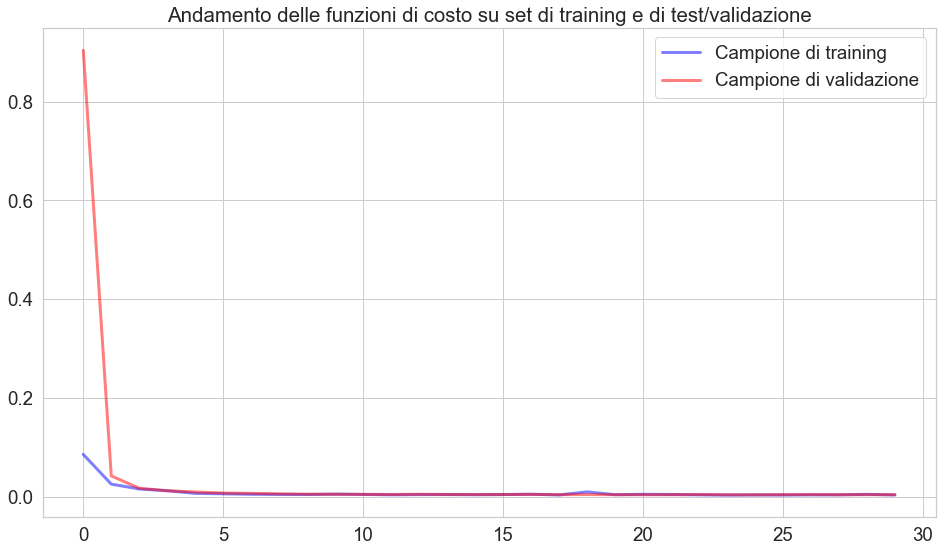

In [40]:
plt.figure(figsize=(16,9))
plt.title("Andamento delle funzioni di costo su set di training e di test/validazione")
plt.plot(hist.history['val_loss'], label='Campione di training', linewidth=3, alpha=0.5, color='blue')
plt.plot(hist.history['loss'], label='Campione di validazione', linewidth=3, alpha=0.5, color='red')
plt.legend()
plt.show()

### Genero dati del tutto nuovi in x

In [41]:
x_new = np.random.uniform(-1.5,1.5,500)
x_sort = x_new.sort()
y_new = newmodel.predict(x_new)
y_tru = f(x_new)

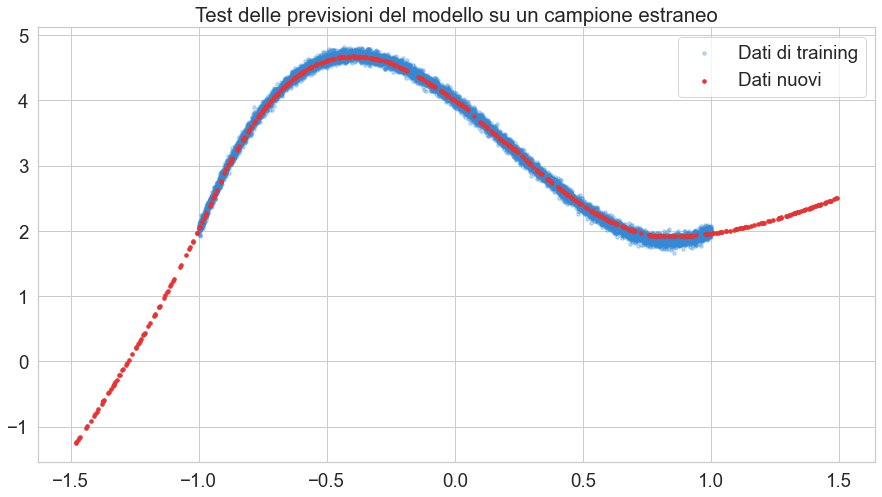

In [51]:
plt.figure(figsize=(15,8))
plt.title('Test delle previsioni del modello su un campione estraneo')
plt.scatter(x_train, y_train, alpha= 0.3, label='Dati di training', marker='.', s=50, color='#3489d6')
#plt.scatter(x_new, y_tru, marker='.', linestyle='-', s=10, color='black', label='Andamento teorico', alpha=0.4)
plt.scatter(x_new, y_new, alpha=1, label='Dati nuovi', marker='.', s=50, color='#e93232')

plt.legend()
plt.show()

## Parte tre

In [65]:
def g(x,y):
    return np.sin(x**2+y**2)


np.random.seed(0)

x_train = np.zeros((10000, 2))
x_train[:,0] = np.random.uniform(-1.5, 1.5, 10000)
x_train[:,1] = np.random.uniform(-1.5, 1.5, 10000)

x_new = np.zeros((5000, 2))
x_new[:,0] = np.random.uniform(-1.5, 1.5, 5000)
x_new[:,1] = np.random.uniform(-1.5, 1.5, 5000)

x_valid = np.zeros((1500,2))
x_valid[:,0] = np.random.uniform(-1.5, 1.5, 1500)
x_valid[:,1] = np.random.uniform(-1.5, 1.5, 1500)

et = np.sin(x_valid[:,0]**2 + x_valid[:,1]**2)

sigma = 0.01
z_train = np.random.normal(np.sin(x_train[:,0]**2 + x_train[:,1]**2), sigma) 
z_valid = np.random.normal(np.sin(x_valid[:,0]**2 + x_valid[:,1]**2), sigma)

In [67]:
model3 = tf.keras.Sequential()
model3.add(Dense(units=16, input_shape=(2,), activation='linear'))
model3.add(Dense(units=32, activation='selu'))
model3.add(Dense(units=32, activation='elu'))
model3.add(Dense(units=1, activation='linear'))
model3.compile(optimizer='adam', loss='mse', metrics=['mse'])
model3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_35 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_36 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 33        
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________


In [68]:
# anche in questa cella ho cancellato i log di keras

hist3 = model3.fit(x=x_train, y=z_train, 
              batch_size=32, epochs=100, 
              validation_data=(x_valid, z_valid), shuffle=True)

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 0.1638 - mse: 0.1638 - val_loss: 0.1197 - val_mse: 0.1197
Epoch 2/100
313/313 [==============================] - 0s 1ms/step - loss: 0.1060 - mse: 0.1060 - val_loss: 0.0937 - val_mse: 0.0937
Epoch 3/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0820 - mse: 0.0820 - val_loss: 0.0822 - val_mse: 0.0822
Epoch 4/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0652 - mse: 0.0652 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 5/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0484 - mse: 0.0484 - val_loss: 0.0396 - val_mse: 0.0396
Epoch 6/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0422 - val_mse: 0.0422
Epoch 7/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 8/100
313/313 [==============================] - 0s 2ms/step - 

313/313 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 63/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 64/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 65/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 66/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 67/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 68/100
313/313 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 69/100
313/313 [==============================] - 0s 1ms/step - loss:

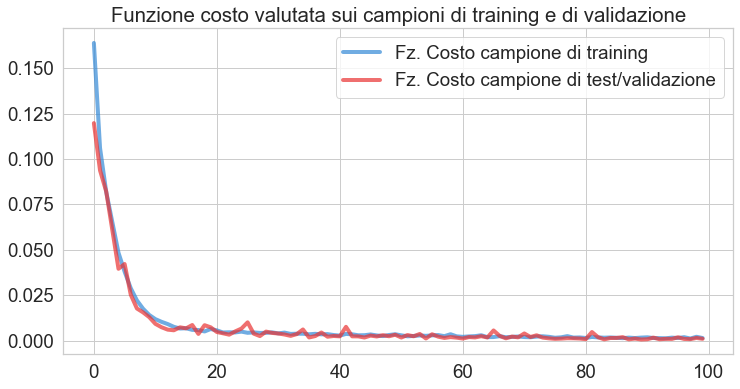

In [69]:
plt.figure(figsize=(12,6))
plt.title('Funzione costo valutata sui campioni di training e di validazione')
plt.plot(hist3.history['loss'], linewidth=4, alpha=0.7, color='#3489d6', label='Fz. Costo campione di training')
plt.plot(hist3.history['val_loss'], linewidth=4, alpha=0.7, color='#e93232', label='Fz. Costo campione di test/validazione')
plt.legend()
plt.show()

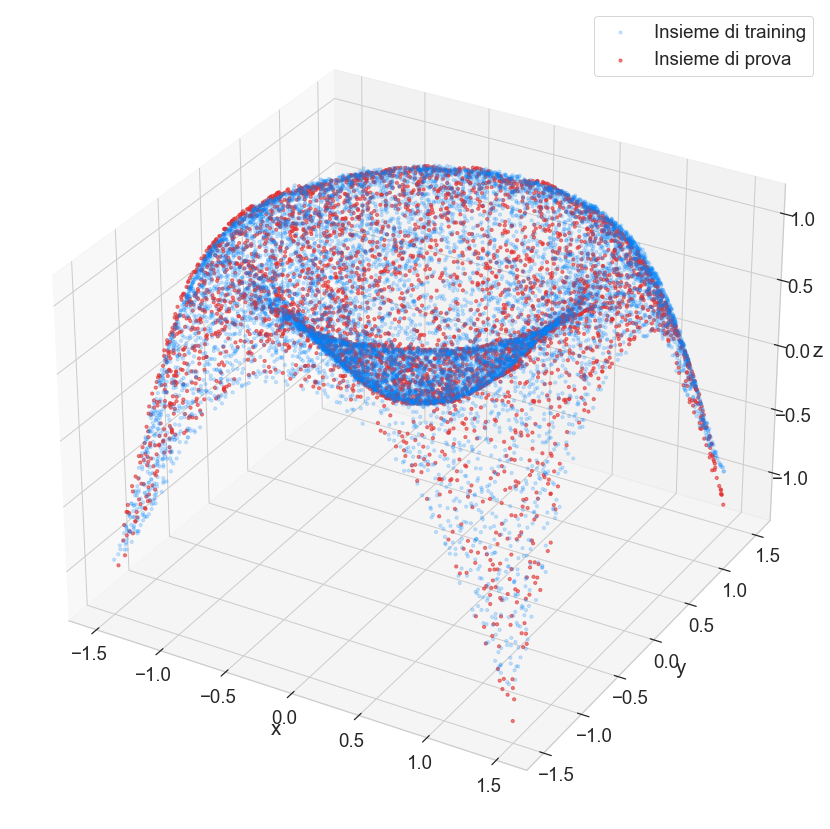

In [82]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.scatter3D(x_train[:,0], x_train[:,1], z_train, color='#0085ff', alpha=0.2, s = 10, label='Insieme di training')
ax.scatter3D(x_new[:,0], x_new[:,1], model3.predict(x_new), color='#e33030', alpha=0.6, s = 10, label='Insieme di prova')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()